## Purpose

This code performs **linear regression** using the Advertising dataset to predict sales based on advertising budgets across three media: **TV**, **Radio**, and **Newspaper**. The goal is to evaluate how well a linear model can predict sales from these inputs.

## Dataset
* Source: https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv
* Content:
    * A dataset used in many **introductory machine learning** and data science tutorials.
    * It has 200 rows and 4 columns:
        * **TV:** Advertising budget spent on TV (in thousands of dollars)
        * **Radio:** Advertising budget spent on Radio
        * **Newspaper:** Advertising budget spent on Newspaper
        * **Sales:** Units sold (in thousands)

## Main Features

* Data Loading using **pandas**
* Feature Selection (**TV**, **radio**, **newspaper**) and Target Variable (**sales**)
* Train/Test Split using **train_test_split**
* Model Training using **LinearRegression** from **scikit-learn**
* Prediction on test data
* Model Evaluation using:
    * R² Score (Goodness of fit)
    * Mean Squared Error (MSE)
    * Coefficients of the model
* Visualization with **seaborn** to compare actual vs predicted sales

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Load dataset
data = pd.read_csv("Dataset/Advertising.csv")

# Show the first few rows
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
# Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [14]:
# Feature and target
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
# Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predictions
y_pred = model.predict(X_test)

In [18]:
# Evaluation
print("R^2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", model.coef_)

R^2 Score: 0.8927605914615384
MSE: 1.9918855518287906
Coefficients: [0.0468431  0.17854434 0.00258619]


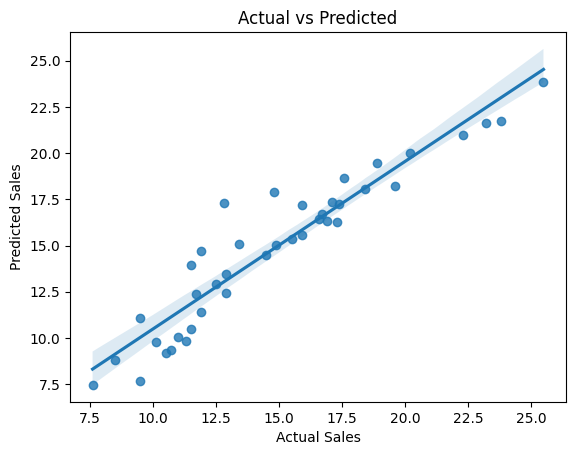

In [19]:
# Visualization
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted")
plt.show()